In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
from bs4 import BeautifulSoup
import time
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
import pickle
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import winsound

from cmath import nan

sound_file = "data/audio/Jobs Done.wav"

def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)


bad_sound_file = 'data/audio/Danger Will Robinson.wav'

def play_danger():
    winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)



In [70]:
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V15.csv') 
print(df.shape)
df.head(3)

(8244, 694)


,Unnamed: 0.2,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,...,Dif_Opp_Avg_Ctrl_time_sec_per_round,Dif_Opp_Avg_Ctrl_time_tot_per_round,Dif_Opp_Avg_Head_Strikes_land_per_round,Dif_Opp_Avg_Head_Strikes_att_per_round,Dif_Opp_Avg_Total_Strikes_land_per_round,Dif_Opp_Avg_Total_Strikes_att_per_round,A_Initial_Martial_Art,B_Initial_Martial_Art,A_Second_Martial_Art,B_Second_Martial_Art
0,0,0,Holly Holm,Irene Aldana,0,0,154,301,69,185,...,-0.538617,-4.167111,-1.585026,-5.042354,-2.424553,-6.279826,Boxing,Muay Thai,Kickboxing,Boxing
1,1,1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,...,NaN,NaN,-inf,-inf,-inf,-inf,Brazilian Jiu-Jitsu,Muay Thai,Muay Thai,NaN
2,2,2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,...,-4.611111,-51.277778,-5.416667,-16.861111,-11.888889,-24.777778,Judo,Krav Maga,Wrestling,NaN


In [71]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
A_topdown_Avg_Kd_per_round,893
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
Dif_Opp_Avg_Total_Strikes_att_per_round,604
A_Initial_Martial_Art,29
B_Initial_Martial_Art,29
A_Second_Martial_Art,541


In [72]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]
InFightData


['InFightData__Method_Primary',
 'InFightData__Method_Detail',
 'InFightData__Round',
 'InFightData__Time',
 'InFightData__General_Method',
 'InFightData__Total_Fight_Time_Seconds']

In [73]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [74]:
df.columns[:50]

Index(['Fighter_A', 'Fighter_B', 'A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details', 'event_title',
       'event_url', 'date', 'Winner', 'fight_id', 'A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land

In [75]:
df.columns[51:85]

Index(['B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent', 'event_code',
       'Fighter_A_Odds', 'Fighter_B_Odds', 'Fighter_A_Odds_Change',
       'Fighter_B_Odds_Change', 'Dif_Kd', 'Dif_Sig_strike_land',
       'Dif_Sig_strike_att', 'Dif_Sig_strike_percent'],
      dtype='object')

In [76]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [77]:
# drop all Dif Rows
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

#### Check NAN

In [78]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

,0
A_topdown_Avg_Kd_per_round,893
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
Dif_Opp_Avg_Total_Strikes_att_per_round,604
A_Initial_Martial_Art,29
B_Initial_Martial_Art,29
A_Second_Martial_Art,541


In [79]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [80]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [81]:
all_cols = df.columns.to_list()
all_cols

['Fighter_A',
 'Fighter_B',
 'event_title',
 'event_url',
 'date',
 'Winner',
 'fight_id',
 'event_code',
 'Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_median',
 'B_Rolling_Sig_strike_att_median',
 'A_Rolling_Sig_strike_percent_mean',
 'B_Rolling_Sig_strike_percent_mean',
 'A_Rolling_Sig_strike_percent_std',
 'B_Rolling_Sig_strike_percent_std',
 'A_Rolling_Sig_strike_percent_median',
 'B_Rolling_Sig_strike_percent_median',
 'A_Rolli

In [82]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [83]:
# check Winner column
df['Winner'].value_counts()

Jim Miller          46
Donald Cerrone      38
Charles Oliveira    38
Jon Jones           36
Dustin Poirier      34
                    ..
Chuck Liddell        2
Jordan Rinaldi       2
Daniel Spitz         2
Chris Kelades        2
Royston Wee          2
Name: Winner, Length: 1151, dtype: int64

In [84]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [85]:
# check value counts
df['win?'].value_counts()

1    4122
0    4122
Name: win?, dtype: int64

In [86]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       2733
           1       1461
1          1       2661
           0       1389
Name: win?, dtype: int64

In [87]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    2661
0    1389
Name: win?, dtype: int64

In [88]:
2626/(2626+ 1373)

0.6566641660415103

#### Assign Target and Split

In [89]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [90]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['fight_weightclass',
 'A_Initial_Martial_Art',
 'B_Initial_Martial_Art',
 'A_Second_Martial_Art',
 'B_Second_Martial_Art']

In [91]:
# make sure categorical_columns are all strings
for col in categorical_columns:
    X[col] = X[col].astype(str)


In [92]:
numerical_columns

['Fighter_A_Odds',
 'Fighter_B_Odds',
 'Fighter_A_Odds_Change',
 'Fighter_B_Odds_Change',
 'Dif_Odds',
 'A_Rolling_Kd_mean',
 'B_Rolling_Kd_mean',
 'A_Rolling_Kd_std',
 'B_Rolling_Kd_std',
 'A_Rolling_Kd_median',
 'B_Rolling_Kd_median',
 'A_Rolling_Sig_strike_land_mean',
 'B_Rolling_Sig_strike_land_mean',
 'A_Rolling_Sig_strike_land_std',
 'B_Rolling_Sig_strike_land_std',
 'A_Rolling_Sig_strike_land_median',
 'B_Rolling_Sig_strike_land_median',
 'A_Rolling_Sig_strike_att_mean',
 'B_Rolling_Sig_strike_att_mean',
 'A_Rolling_Sig_strike_att_std',
 'B_Rolling_Sig_strike_att_std',
 'A_Rolling_Sig_strike_att_median',
 'B_Rolling_Sig_strike_att_median',
 'A_Rolling_Sig_strike_percent_mean',
 'B_Rolling_Sig_strike_percent_mean',
 'A_Rolling_Sig_strike_percent_std',
 'B_Rolling_Sig_strike_percent_std',
 'A_Rolling_Sig_strike_percent_median',
 'B_Rolling_Sig_strike_percent_median',
 'A_Rolling_Total_Strikes_land_mean',
 'B_Rolling_Total_Strikes_land_mean',
 'A_Rolling_Total_Strikes_land_std',
 '

In [93]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [94]:
col_list = X.columns.to_list()

#### Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[369, 564, 565, 566, 567, 378]

In [97]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [98]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
checker = ohe.fit_transform(X_train[categorical_columns])

In [99]:
feature_names_categorical = ohe.get_feature_names(categorical_columns)

### Preprocessing

In [100]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [369, 564, 565, 566, 567, 378])])

### Function Additions

In [101]:
# SOURCE: The origin of this confusion matrix code was found on medium, '
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            a = cf[0,0]
            b = cf[0,1]
            c = cf[1,0]
            d = cf[1,1]
            tn = ((a / (a+b))*100).round(2).astype(str) + '%'
            fp = ((b / (a+b))*100).round(2).astype(str) + '%'
            fn = ((c / (c+d))*100).round(2).astype(str) + '%'
            tp = ((d / (c+d))*100).round(2).astype(str) + '%'
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            rwf_score = (1+(2**2)) * ((precision * recall) / (((2**2) * precision) + recall))
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\n\nRecall-Weighted F Score={:0.3f}".format(
                accuracy,precision,recall,f1_score, rwf_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages =  [tn,fp,fn,tp]
        # old = group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label', weight = 'bold')
        plt.xlabel('Predicted label' + stats_text, weight = 'bold')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title,size = 20, weight = 'bold')

In [102]:
dfcols = ['Model', 'RWF Score', 'F1',  'Recall',  'Precision',  'Accuracy']
model_summary = pd.DataFrame(columns=dfcols)
model_summary

,Model,RWF Score,F1,Recall,Precision,Accuracy


In [103]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
            global model_summary2
            row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]
            res = pd.DataFrame(columns = dfcols2, data = row)
            yeep = [model_summary2, res]
            model_summary2 = pd.concat(yeep)
            model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
            model_summary2 = model_summary2.drop_duplicates()
            return model_summary2.round(3)

In [104]:
# Function runs model, fits it, and saves the results
def run_model(model, model_name):
    model.fit(X_train, y_train)
    model_prediction = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, model_prediction)
    save_result(cf_matrix, model_name)
    cf = make_confusion_matrix(cf_matrix)
    return model_summary

In [105]:
dfcols2 = ['Model', 'Cv_Mean_Accuracy', 'Cv_Std']
model_summary2 = pd.DataFrame(columns=dfcols2)
model_summary2

,Model,Cv_Mean_Accuracy,Cv_Std


In [106]:
def make_cf(model):
    #load pickle file
    with open(model, 'rb') as f:
        model = pickle.load(f)
    #get predictions
    y_pred = model.predict(X_test)
    cf = plot_confusion_matrix(model, y_test, y_pred)
    return cf

In [107]:
# Function creates a pipeline, runs it, saves the result, and saves a pickle file

def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(f'models/{model_name}.pkl', 'wb'))
    return res

### Run Vanilla Models

In [108]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, SVC(probability=True), 'SVC')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')

,Model,Cv_Mean_Accuracy,Cv_Std
0,SVC,0.717,0.009
0,Random_Forest,0.716,0.009
0,XGBoost,0.712,0.003
0,Extra_Trees,0.704,0.008
0,Logistic_Regression,0.690,0.001
0,Bagged_Trees,0.673,0.008
0,K_Neighbors,0.624,0.012
0,Decision_Tree,0.613,0.004


In [109]:
# Function cross validates a model and saves the result and a pickle file
def gridsearched_model(model, model_name):
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(f'models/{model_name}.pkl', 'wb'))
    # make confusion matrix
    return res

In [43]:
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=500), 'Random_Forest_500')
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000), 'Random_Forest_1000')


,Model,Cv_Mean_Accuracy,Cv_Std
0,Random_Forest_1000,0.721,0.005
0,Random_Forest_500,0.720,0.008
0,SVC,0.717,0.009
0,XGBoost,0.712,0.003
0,Random_Forest,0.704,0.004
0,Extra_Trees,0.696,0.002
0,Logistic_Regression,0.690,0.001
0,Bagged_Trees,0.669,0.012
0,K_Neighbors,0.624,0.012
0,Decision_Tree,0.605,0.027


#### Estimators Best at 1000

Now max features

In [44]:
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'auto'), 'Random_Forest_mf_auto')
create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000, max_features = 'sqrt'), 'Random_Forest_mf_sqrt')


,Model,Cv_Mean_Accuracy,Cv_Std
0,Random_Forest_mf_sqrt,0.721,0.005
0,Random_Forest_500,0.720,0.001
0,Random_Forest_1000,0.720,0.004
0,Random_Forest_mf_auto,0.719,0.005
0,SVC,0.717,0.009
0,XGBoost,0.712,0.003
0,Extra_Trees,0.700,0.004
0,Random_Forest,0.699,0.010
0,Logistic_Regression,0.690,0.001
0,Bagged_Trees,0.675,0.003


In [113]:
import pprint

In [134]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          graph=True,
                          display_all_params=True):
    """
    Visualizes the results of a grid search performed using scikit-learn's GridSearchCV.
    Used to perform sensitivity analysis of hyperparameters.

    Parameters:
    - grid_clf: GridSearchCV object (fitted)
    - param_name: str, the name of the hyperparameter to be plotted
    - num_results: int, number of top results to display in tabular form (default: 15)
    - graph: bool, whether to display a plot (default: True)
    - display_all_params: bool, whether to display all hyperparameters of the best estimator (default: True)
    """
    
    if not isinstance(grid_clf, GridSearchCV):
        raise ValueError("grid_clf must be an instance of GridSearchCV.")
    
    if not hasattr(grid_clf, 'cv_results_'):
        raise ValueError("GridSearchCV object must be fitted with data.")
    
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    if param_name not in grid_clf.param_grid:
        raise ValueError(f"{param_name} not found in hyperparameters used in the grid search.")

    print(f"best parameters: {clf_params}")
    print(f"best score:      {clf_score:0.5f} (+/-{clf_stdev:0.5f})")
    if display_all_params:
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    display(pd.DataFrame(cv_results).sort_values(by='rank_test_score').head(num_results))

    # PLOT
    # Custom conversion function
    def convert_to_str(value):
        if value in ['log2', 'sqrt']:
            return value
        return str(value)

    # Convert the hyperparameter values to strings, avoiding conversion of 'log2' and 'sqrt'
    scores_df[new_param] = scores_df[new_param].apply(convert_to_str)
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # Get the index of the best hyperparameter value
    param_indices = params.index.tolist()
    best_param_index = param_indices.index(best_param)

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        try:
            plt.errorbar(range(len(params)), means, yerr=stds)  # Use index instead of actual values
            plt.xticks(range(len(params)), params)  # Set x-axis labels to the hyperparameter values
            plt.axhline(y=best_mean + best_stdev, color='red')
            plt.axhline(y=best_mean - best_stdev, color='red')
            plt.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            plt.title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()
        except TypeError:
            plt.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            plt.title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            plt.xlabel(param_name)
            plt.ylabel('Score')
            plt.show()

# load random forest model from pickle
import pickle
with open('models/Random_Forest_1000.pkl', 'rb') as f:
    rf_model = pickle.load(f)

param_grid = {'model__n_estimators' : [100],
                    'model__max_depth' : [None],
                    'model__max_features' : ['auto', 'sqrt', 'log2', 0.5, 0.75],
                    'model__criterion' : ['gini'],
                    'model__min_samples_split' : [2],
                    'model__min_samples_leaf' : [1],
                    'model__bootstrap' :  [True],
                    'model__max_leaf_nodes' : [None],
                    'model__min_impurity_decrease' : [0.0],
                    'model__ccp_alpha' : [0.0]}

# Initialize the GridSearchCV object with the model (SVC), parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Use the GridSearch_table_plot function to visualize the results
# Specify the hyperparameter to plot (e.g., 'C') and other optional arguments
GridSearch_table_plot(grid_search, param_name='model__max_features', num_results=5, graph=True, display_all_params=True)

play_jobs_done()
play_jobs_done()

best parameters: {'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__max_leaf_nodes': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
best score:      0.71163 (+/-0.01484)
{'memory': None,
 'model': RandomForestClassifier(max_features='sqrt'),
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False,
 'preprocess': ColumnTransformer(transforme

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bootstrap,param_model__ccp_alpha,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__max_leaf_nodes,...,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,2.774296,0.010488,0.073000,0.001000,True,0.0,gini,None,sqrt,None,...,2,100,"{'model__bootstrap': True, 'model__ccp_alpha':...",0.703105,0.722510,0.728978,0.691909,0.711625,0.014840,1
4,50.267138,0.492863,0.073807,0.001356,True,0.0,gini,None,0.75,None,...,2,100,"{'model__bootstrap': True, 'model__ccp_alpha':...",0.694696,0.715395,0.703105,0.701618,0.703703,0.007459,2
0,2.771649,0.034083,0.072249,0.001479,True,0.0,gini,None,auto,None,...,2,100,"{'model__bootstrap': True, 'model__ccp_alpha':...",0.690168,0.717982,0.712160,0.694498,0.703702,0.011655,3
2,1.254074,0.008800,0.075250,0.001920,True,0.0,gini,None,log2,None,...,2,100,"{'model__bootstrap': True, 'model__ccp_alpha':...",0.695990,0.710867,0.705692,0.692557,0.701276,0.007339,4
3,33.254334,0.247473,0.074250,0.002279,True,0.0,gini,None,0.5,None,...,2,100,"{'model__bootstrap': True, 'model__ccp_alpha':...",0.686287,0.708926,0.696636,0.699029,0.697720,0.008049,5


ValueError: 'sqrt' is not in list

Original Code

In [47]:
# ## ORIGINAL CODE ##

# def random_forest_gridsearch(model):
#     init_grid = {'model__n_estimators' : [50, 100, 150, 200, 350, 500, 750, 1000],
#                     'model__max_depth' : [None],
#                     'model__max_features' : ['auto'],
#                     'model__criterion' : ['gini'],
#                     'model__min_samples_split' : [2],
#                     'model__min_samples_leaf' : [1],
#                     'model__bootstrap' :  [True],
#                     'model__max_leaf_nodes' : [None],
#                     'model__min_impurity_decrease' : [0.0],
#                     'model__ccp_alpha' : [0.0]}

#     # grid search #1  - n_estimators
#     gridsearch_1 = GridSearchCV(model, init_grid, cv = 4, scoring = 'accuracy', n_jobs = 16, verbose = 10)
#     gridsearch_1.fit(X_train, y_train)
#     gridsearched_model(gridsearch_1.best_estimator_, 'Random_Forest_Gridsearched_1')
#     bp = gridsearch_1.best_params_
#     bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

#     # get param values
#     n_est = bp2[bp2['index'] == 'model__n_estimators']
#     n_est = n_est[0].values[0]

#     # if estimators or depth is min or max, keep pushing boundaries

#     if n_est == 1000:
#         # go higher!
#         grid2 = {'model__n_estimators' : [500, 650, 800, 1000, 1500, 2000],
#                     'model__max_depth' : [None],
#                     'model__max_features' : ['auto'],
#                     'model__criterion' : ['gini', 'entropy'],
#                     'model__min_samples_split' : [2],
#                     'model__min_samples_leaf' : [1],
#                     'model__bootstrap' :  [True],
#                     'model__max_leaf_nodes' : [None],
#                     'model__min_impurity_decrease' : [0.0],
#                     'model__ccp_alpha' : [0.0]}
#         gridsearch_2 = GridSearchCV(model, grid2, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_2.fit(X_train, y_train)
#         gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
#         bp = gridsearch_2.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

#     if n_est == 50:
#         # go lower
#         grid2 = {'model__n_estimators' : [20, 30, 40, 50, 60, 75, 100],
#                     'model__max_depth' : [None],
#                     'model__max_features' : ['auto'],
#                     'model__criterion' : ['gini'],
#                     'model__min_samples_split' : [2],
#                     'model__min_samples_leaf' : [1],
#                     'model__bootstrap' :  [True],
#                     'model__max_leaf_nodes' : [None],
#                     'model__min_impurity_decrease' : [0.0],
#                     'model__ccp_alpha' : [0.0]}
#         gridsearch_2 = GridSearchCV(model, grid2, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_2.fit(X_train, y_train)
#         gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
#         bp = gridsearch_2.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

#     else:
#         print(f'Best n_estimators: {n_est}')
#         maxdepth_grid = {'model__n_estimators' : [n_est],
#                     'model__max_depth' : [None, 2,3,4,5,6,7,8,9,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 100],
#                     'model__max_features' : ['auto'],
#                     'model__criterion' : ['gini'],
#                     'model__min_samples_split' : [2],
#                     'model__min_samples_leaf' : [1],
#                     'model__bootstrap' :  [True],
#                     'model__max_leaf_nodes' : [None],
#                     'model__min_impurity_decrease' : [0.0],
#                     'model__ccp_alpha' : [0.0]}

#         ##### GRID SEARCH 2 -- MAX DEPTH #####
#         gridsearch_2 = GridSearchCV(model, maxdepth_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_2.fit(X_train, y_train)
#         gridsearched_model(gridsearch_2.best_estimator_, 'Random_Forest_Gridsearched_2')
#         bp = gridsearch_2.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         max_depth = bp2[bp2['index'] == 'model__max_depth']
#         max_depth = max_depth[0].values[0]
#         print(f'Best max_depth: {max_depth}')

#         ##### GRID SEARCH 3 -- MAX FEATURES #####
#         max_features_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : ['auto', 'sqrt', 'log2', .4, .5, .6, .7, .8, .9, 1.0],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [2],
#                                 'model__min_samples_leaf' : [1],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [None],
#                                 'model__min_impurity_decrease' : [0.0],
#                                 'model__ccp_alpha' : [0.0]}
#         gridsearch_3 = GridSearchCV(model, max_features_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)

#         gridsearch_3.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_3.best_estimator_, 'Random_Forest_Gridsearched_3')
#         bp = gridsearch_3.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         max_features = bp2[bp2['index'] == 'model__max_features']
#         max_features = max_features[0].values[0]
#         print(f'Best max_features: {max_features}')

#         ##### GRID SEARCH 4 -- MIN SAMPLES SPLIT #####
#         min_samples_split_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : [max_features],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
#                                 'model__min_samples_leaf' : [1],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [None],
#                                 'model__min_impurity_decrease' : [0.0],
#                                 'model__ccp_alpha' : [0.0]}

#         gridsearch_4 = GridSearchCV(model, min_samples_split_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_4.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_4.best_estimator_, 'Random_Forest_Gridsearched_4')
#         bp = gridsearch_4.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
#         min_samples_split = min_samples_split[0].values[0]
#         print(f'Best min_samples_split: {min_samples_split}')

#         ##### GRID SEARCH 5 -- MIN SAMPLES LEAF #####
#         min_samples_leaf_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : [max_features],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [min_samples_split],
#                                 'model__min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [None],
#                                 'model__min_impurity_decrease' : [0.0],
#                                 'model__ccp_alpha' : [0.0]}

#         gridsearch_5 = GridSearchCV(model, min_samples_leaf_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_5.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_5.best_estimator_, 'Random_Forest_Gridsearched_5')
#         bp = gridsearch_5.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
#         min_samples_leaf = min_samples_leaf[0].values[0]
#         print(f'Best min_samples_leaf: {min_samples_leaf}')

#         ##### GRID SEARCH 6 -- MAX LEAF NODES #####
#         max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : [max_features],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [min_samples_split],
#                                 'model__min_samples_leaf' : [min_samples_leaf],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                                 'model__min_impurity_decrease' : [0.0],
#                                 'model__ccp_alpha' : [0.0]}
#         gridsearch_6 = GridSearchCV(model, max_leaf_nodes_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_6.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_6.best_estimator_, 'Random_Forest_Gridsearched_6')
#         bp = gridsearch_6.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
#         max_leaf_nodes = max_leaf_nodes[0].values[0]
#         print(f'Best max_leaf_nodes: {max_leaf_nodes}')

#         ##### GRID SEARCH 7 -- MIN IMPURITY DECREASE #####
#         min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : [max_features],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [min_samples_split],
#                                 'model__min_samples_leaf' : [min_samples_leaf],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [max_leaf_nodes],
#                                 'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
#                                 'model__ccp_alpha' : [0.0]}
#         gridsearch_7 = GridSearchCV(model, min_impurity_decrease_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_7.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_7.best_estimator_, 'Random_Forest_Gridsearched_7')
#         bp = gridsearch_7.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
#         min_impurity_decrease = min_impurity_decrease[0].values[0]
#         print(f'Best min_impurity_decrease: {min_impurity_decrease}')

#         ##### GRID SEARCH 8 -- CCP ALPHA #####
#         ccp_alpha_grid = {'model__n_estimators' : [n_est],
#                                 'model__max_depth' : [max_depth],
#                                 'model__max_features' : [max_features],
#                                 'model__criterion' : ['gini'],
#                                 'model__min_samples_split' : [min_samples_split],
#                                 'model__min_samples_leaf' : [min_samples_leaf],
#                                 'model__bootstrap' :  [True],
#                                 'model__max_leaf_nodes' : [max_leaf_nodes],
#                                 'model__min_impurity_decrease' : [min_impurity_decrease],
#                                 'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
                                
#         gridsearch_8 = GridSearchCV(model, ccp_alpha_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
#         gridsearch_8.fit(X_train, y_train)
#         gm = gridsearched_model(gridsearch_8.best_estimator_, 'Random_Forest_Gridsearched_8') 
#         bp = gridsearch_8.best_params_
#         bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
#         ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
#         ccp_alpha = ccp_alpha[0].values[0]
#         print(f'Best ccp_alpha: {ccp_alpha}')

#         return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_

Updated Random Forest Gridsearch #1

In [111]:
def random_forest_gridsearch(model, X_train, y_train):
    """
    This function performs a sequential grid search to find the best hyperparameters for a random forest model.
    The search is done one hyperparameter at a time to improve computational efficiency.
    
    Parameters:
    model: scikit-learn RandomForestClassifier object
    X_train: training data features (2D array-like)
    y_train: training data target labels (1D array-like)
    
    Returns:
    best_estimator: the fitted model with the best hyperparameters
    best_params: a dictionary containing the best hyperparameters found
    """

    # Define the grid of hyperparameters
    param_grids = [
        {'n_estimators': [100, 350, 500],
         'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 8)),
         'min_samples_leaf': list(range(1, 8)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 6)),
         'min_impurity_decrease': [x / 10 for x in range(4)],
         'ccp_alpha': [x / 10 for x in range(6)]}
    ]

    best_params = {}

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # Use the list of values for the current hyperparameter
        current_grid = {param_name: param_values}
        # Update the best parameters found so far
        for k, v in best_params.items():
            if k != param_name:
                current_grid[k] = [v]  # Wrap individual values in a list
        current_grid = {'model__' + k: v for k, v in current_grid.items()}

        # Use GridSearchCV with the current hyperparameter grid
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=10)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]

        # Update the best parameters dictionary with the best value found for the current hyperparameter
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

    # Run gridsearched_model() on the best_estimator object to save the best model
    

    return best_estimator, best_params

In [ ]:
# run the gridsearch
best_estimator, best_params = random_forest_gridsearch(model, X_train, y_train)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

def random_forest_gridsearch(model, X_train, y_train):
    """
    This function performs a sequential grid search to find the best hyperparameters for a random forest model.
    The search is done one hyperparameter at a time to improve computational efficiency.
    
    Parameters:
    model: scikit-learn RandomForestClassifier object
    X_train: training data features (2D array-like)
    y_train: training data target labels (1D array-like)
    gridsearched_model: a function that takes the best estimator and a name as input
    
    Returns:
    best_estimator: the fitted model with the best hyperparameters
    best_params: a dictionary containing the best hyperparameters found
    """

    # Define the grid of hyperparameters
    param_grids = [
        {'n_estimators': [100, 250, 350, 500, 750, 1000, 1500, 2000],
         'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 11)),
         'min_samples_leaf': list(range(1, 11)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 11)),
         'min_impurity_decrease': [x / 10 for x in range(6)],
         'ccp_alpha': [x / 10 for x in range(6)]}
    ]

    best_params = {}

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        current_grid = {param_name: param_values}
        
        # Filter out empty values from best_params and ensure they are in list format
        valid_best_params = {k: [v] if v is not None and not isinstance(v, (list, np.ndarray)) else v 
                             for k, v in best_params.items() if v is not None}
        
        current_grid.update(valid_best_params)
        current_grid = {'model__' + k: v for k, v in current_grid.items()}

        # Use GridSearchCV with the current hyperparameter grid
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=10)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]

        # Update the best parameters dictionary with the best value found for the current hyperparameter
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

        # Call the gridsearched_model function with the best estimator and the current hyperparameter name
        gridsearched_model(best_estimator, f'Random_Forest_Gridsearched_{param_name}')
    
    final_gridsearched_model = gridsearched_model(best_estimator, 'Random_Forest_Gridsearched')

    print(final_gridsearched_model)
    
    return best_estimator, best_params


In [46]:
random_forest = pickle.load(open('models/random_forest.pkl', 'rb'))

In [47]:
# run the function
best_estimator, best_params = random_forest_gridsearch(random_forest, X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best n_estimators: 500
Fitting 4 folds for each of 21 candidates, totalling 84 fits
Best max_depth: 22
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_features: sqrt
Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best criterion: gini
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best min_samples_split: 6
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best min_samples_leaf: 9
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best bootstrap: True
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_leaf_nodes: None
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best min_impurity_decrease: 0.0
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best ccp_alpha: 0.0
                                              Model  Cv_Mean_Accuracy  Cv_Std
0              Random_Forest_Gridsearched_bootstrap             0.727   0.004
0    

Randomized Search

In [53]:
# get the best model from the final_gridsearched_model
model_summary2

,Model,Cv_Mean_Accuracy,Cv_Std
0,Random_Forest_Gridsearched_bootstrap,0.726832,0.003820
0,Random_Forest_Gridsearched_min_samples_leaf,0.725861,0.002991
0,Random_Forest_Gridsearched_min_impurity_decrease,0.724406,0.002474
0,Random_Forest_Gridsearched_max_leaf_nodes,0.724406,0.004500
0,Random_Forest_Gridsearched_ccp_alpha,0.722950,0.003431
0,Random_Forest_Gridsearched,0.721980,0.002377
0,Random_Forest_Gridsearched_max_features,0.721980,0.005446
0,Random_Forest_Gridsearched_max_depth,0.720039,0.003631
0,Random_Forest_Gridsearched_min_samples_split,0.718583,0.004174
0,SVC,0.716642,0.008999


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

def plot_sensitivity_analysis(gridsearch, param_name, metric='mean_test_score'):
    results = gridsearch.cv_results_
    param_values = results['param_' + param_name]
    metric_values = results[metric]
    
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.grid()
    plt.show()

def random_forest_gridsearch(model, X_train, y_train):
    param_grids = [
        {'n_estimators': [100, 250, 500, 1000],
         'max_depth': [None] + list(range(2, 101, 5)),
         'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 11)],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': list(range(2, 11)),
         'min_samples_leaf': list(range(1, 11)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 11)),
         'min_impurity_decrease': [x / 10 for x in range(6)],
         'ccp_alpha': [x / 10 for x in range(6)]}
    ]

    best_params = {}

    for param_name, param_values in param_grids[0].items():
        current_grid = {param_name: param_values}
        valid_best_params = {k: [v] if v is not None and not isinstance(v, (list, np.ndarray)) else v 
                             for k, v in best_params.items() if v is not None}
        current_grid.update(valid_best_params)
        current_grid = {'model__' + k: v for k, v in current_grid.items()}
        gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=16, verbose=10)
        gridsearch.fit(X_train, y_train)
        best_estimator = gridsearch.best_estimator_
        best_param_value = gridsearch.best_params_['model__' + param_name]
        best_params[param_name] = best_param_value
        print(f'Best {param_name}: {best_param_value}')

        # save gridsearch
        pickle.dump(gridsearch, open(f'models/gridsearches/random_forest_gridsearch_{param_name}.pkl', 'wb'))

    final_gridsearched_model = best_estimator
    print(final_gridsearched_model)
    return best_estimator, best_params, gridsearch


In [58]:

# Load the random forest model and your training data
random_forest = pickle.load(open('models/random_forest.pkl', 'rb'))

# Run the modified function
best_estimator, best_params, final_gridsearch = random_forest_gridsearch(random_forest, X_train, y_train)



Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best n_estimators: 500
Fitting 4 folds for each of 21 candidates, totalling 84 fits
Best max_depth: 42
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_features: 1.0
Fitting 4 folds for each of 2 candidates, totalling 8 fits
Best criterion: gini
Fitting 4 folds for each of 9 candidates, totalling 36 fits
Best min_samples_split: 2
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best min_samples_leaf: 7
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best bootstrap: True
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best max_leaf_nodes: None
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best min_impurity_decrease: 0.0
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best ccp_alpha: 0.0
Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standa

In [64]:
import matplotlib.pyplot as plt

def plot_sensitivity_analysis(gridsearch_results, param_name, metric='mean_test_score'):
    param_values = gridsearch_results[param_name]
    metric_values = gridsearch_results[metric]
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.show()

# Store the grid search results for each hyperparameter in a dictionary
gridsearch_results_dict = {}

# Perform a sequential grid search, updating the best parameters found for each hyperparameter
for param_name, param_values in param_grids[0].items():
    current_grid = {param_name: param_values}
    valid_best_params = {k: [v] for k, v in best_params.items()}
    current_grid.update(valid_best_params)
    current_grid = {'model__' + k: v for k, v in current_grid.items()}
    gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', n_jobs=-1, verbose=10)
    gridsearch.fit(X_train, y_train)
    best_params[param_name] = gridsearch.best_params_['model__' + param_name]
    
    # Store the grid search results in the dictionary
    gridsearch_results_dict[param_name] = {
        'param_' + param_name: gridsearch.cv_results_['param_model__' + param_name],
        'mean_test_score': gridsearch.cv_results_['mean_test_score']
    }

# Perform sensitivity analysis for each hyperparameter using the stored grid search results
for param_name in gridsearch_results_dict.keys():
    plot_sensitivity_analysis(gridsearch_results_dict[param_name], param_name='param_' + param_name, metric='mean_test_score')


NameError: name 'param_grids' is not defined

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits


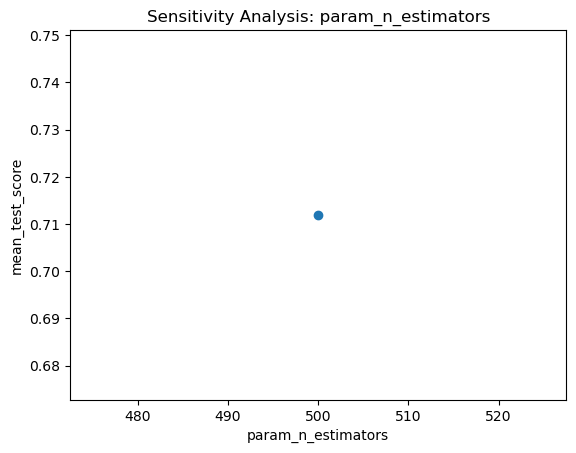

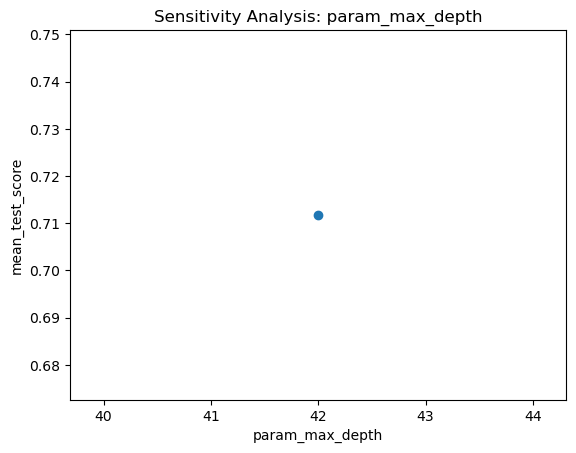

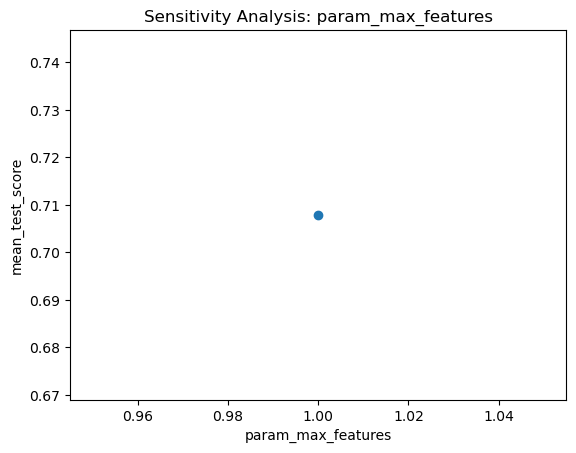

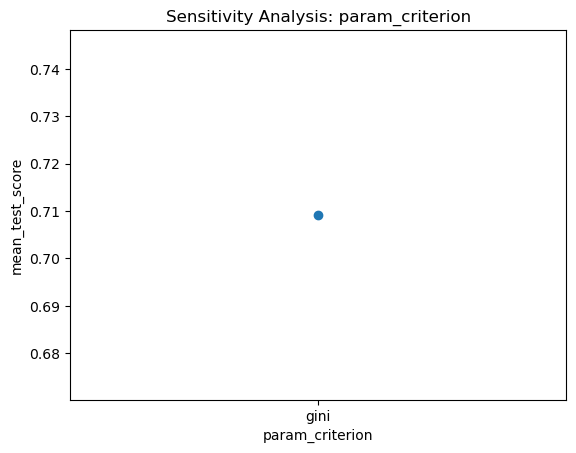

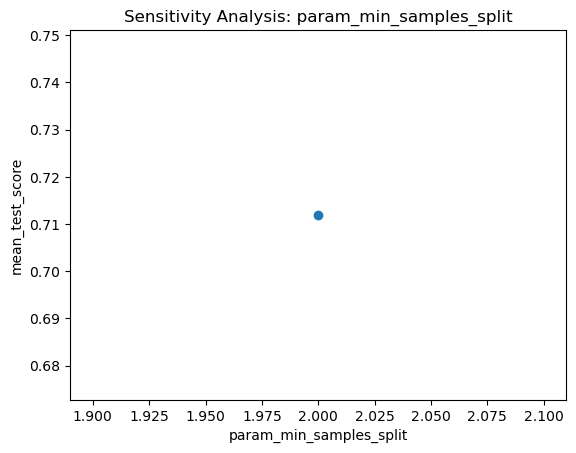

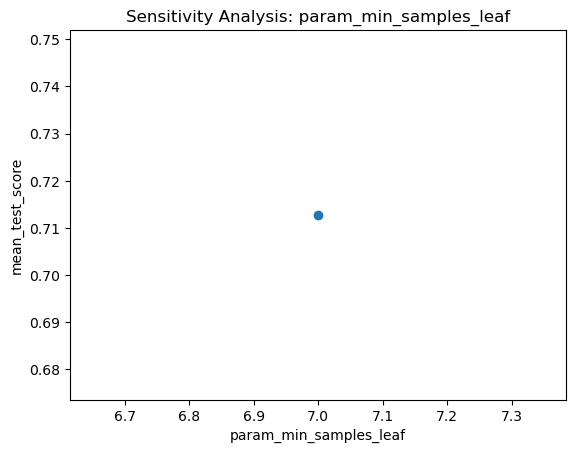

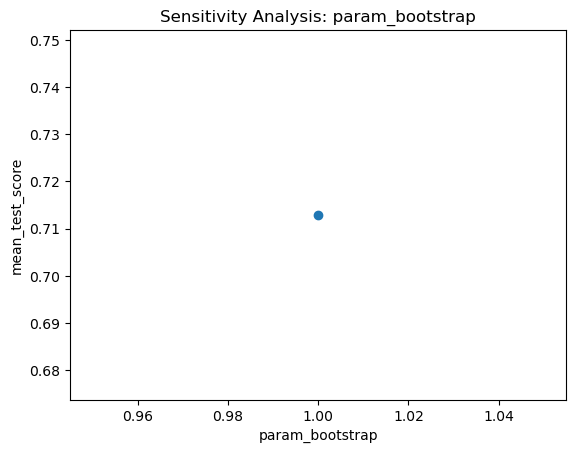

In [68]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Define the grid of hyperparameters
param_grids = {
    'n_estimators': [100, 250],
    'max_depth': [None] + list(range(2, 10, 5)),
    'max_features': ['auto', 'sqrt', 'log2'] + [x / 10 for x in range(4, 7)],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(range(2,4)),
    'min_samples_leaf': list(range(1, 4)),
    'bootstrap': [True],
}

def plot_sensitivity_analysis(gridsearch_results, param_name, metric='mean_test_score'):
    param_values = gridsearch_results[param_name]
    metric_values = gridsearch_results[metric]
    plt.plot(param_values, metric_values, marker='o', linestyle='--')
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.show()

# Store the grid search results for each hyperparameter in a dictionary
gridsearch_results_dict = {}

# Perform a sequential grid search, updating the best parameters found for each hyperparameter
for param_name, param_values in param_grids.items():
    current_grid = {param_name: param_values}
    valid_best_params = {k: [v] for k, v in best_params.items()}
    current_grid.update(valid_best_params)
    current_grid = {'model__' + k: v for k, v in current_grid.items()}
    gridsearch = GridSearchCV(random_forest, current_grid, cv=4, scoring='accuracy', n_jobs=16, verbose=10)
    gridsearch.fit(X_train, y_train)
    best_params[param_name] = gridsearch.best_params_['model__' + param_name]
    
    # Store the grid search results in the dictionary
    gridsearch_results_dict[param_name] = {
        'param_' + param_name: gridsearch.cv_results_['param_model__' + param_name],
        'mean_test_score': gridsearch.cv_results_['mean_test_score']
    }

# Perform sensitivity analysis for each hyperparameter using the stored grid search results
for param_name in gridsearch_results_dict.keys():
    plot_sensitivity_analysis(gridsearch_results_dict[param_name], param_name='param_' + param_name, metric='mean_test_score')


In [ ]:
import matplotlib.pyplot as plt

def plot_sensitivity_analysis(gridsearch, param_name, metric='mean_test_score'):
    """
    Plot sensitivity analysis for a specific hyperparameter from grid search results.

    Parameters:
        gridsearch: Fitted GridSearchCV object
        param_name: The name of the hyperparameter for sensitivity analysis
        metric: Scikit-learn scoring metric used in grid search (e.g., 'mean_test_score')
    """
    # Get the grid search results as a DataFrame
    results_df = pd.DataFrame(gridsearch.cv_results_)
    
    # Extract the values of the hyperparameter and the corresponding test scores
    param_values = results_df[param_name]
    test_scores = results_df[metric]
    
    # Plot the sensitivity analysis
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, test_scores, marker='o')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.title(f'Sensitivity Analysis: {param_name}')
    plt.grid(True)
    plt.show()

# Example usage
# gridsearch: Fitted GridSearchCV object returned by random_forest_gridsearch function
# param_name: Hyperparameter name for analysis (e.g., 'model__max_depth')
# metric: Scikit-learn scoring metric used in grid search (e.g., 'mean_test_score')

# Perform sensitivity analysis for each hyperparameter in best_params
for param_name in best_params.keys():
    plot_sensitivity_analysis(gridsearch, param_name='model__' + param_name, metric='mean_test_score')


### Model 1: XGBoost

In [ ]:
xg_boost = pickle.load(open('models/XGBoost.pkl', 'rb'))
keys = xg_boost.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
xg_boost[1].get_params
stopjere

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=32,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [ ]:
def xgboost_gridsearch(model):
        ##### GRID SEARCH 1 -- N ESTIMATORS #####
        n_est_grid = {'model__n_estimators' : [50, 100, 200, 300, 500, 600,  800,  1000],
                                'model__max_depth' : [None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_1 = GridSearchCV(model, n_est_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'XGBoost_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]
        print(f'Best n_estimators: {n_est}')

        ##### GRID SEARCH 2 -- MAX DEPTH #####
        max_depth_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
                                'model__learning_rate' : [0.1],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}


        gridsearch_2 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'XGBoost_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]
        print(f'Best max_depth: {max_depth}')

        ##### GRID SEARCH 3 -- LEARNING RATE #####
        learning_rate_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                                'model__min_child_weight' : [1],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_3 = GridSearchCV(model, learning_rate_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'XGBoost_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        learning_rate = bp2[bp2['index'] == 'model__learning_rate']
        learning_rate = learning_rate[0].values[0]
        print(f'Best learning_rate: {learning_rate}')

        ##### GRID SEARCH 4 -- MIN CHILD WEIGHT #####
        min_child_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__gamma' : [0],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_4 = GridSearchCV(model, min_child_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'XGBoost_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        min_child_weight = bp2[bp2['index'] == 'model__min_child_weight']
        min_child_weight = min_child_weight[0].values[0]
        print(f'Best min_child_weight: {min_child_weight}')

        ##### GRID SEARCH 5 -- GAMMA #####
        gamma_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__subsample' : [1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_5 = GridSearchCV(model, gamma_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'XGBoost_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        gamma = bp2[bp2['index'] == 'model__gamma']
        gamma = gamma[0].values[0]
        print(f'Best gamma: {gamma}')

        ##### GRID SEARCH 6 -- SUBSAMPLE #####
        subsample_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bytree' : [1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_6 = GridSearchCV(model, subsample_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'XGBoost_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        subsample = bp2[bp2['index'] == 'model__subsample']
        subsample = subsample[0].values[0]
        print(f'Best subsample: {subsample}')

        ##### GRID SEARCH 7 -- COLSAMPLE BYTREE #####
        colsample_bytree_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bylevel' : [1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_7 = GridSearchCV(model, colsample_bytree_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'XGBoost_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bytree = bp2[bp2['index'] == 'model__colsample_bytree']
        colsample_bytree = colsample_bytree[0].values[0]
        print(f'Best colsample_bytree: {colsample_bytree}')

        ##### GRID SEARCH 8 -- COLSAMPLE BYLEVEL #####
        colsample_bylevel_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__colsample_bynode' : [1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_8 = GridSearchCV(model, colsample_bylevel_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'XGBoost_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bylevel = bp2[bp2['index'] == 'model__colsample_bylevel']
        colsample_bylevel = colsample_bylevel[0].values[0]

        print(f'Best colsample_bylevel: {colsample_bylevel}')

        ##### GRID SEARCH 9 -- COLSAMPLE BYNODE #####
        colsample_bynode_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                                'model__reg_alpha' : [0],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_9 = GridSearchCV(model, colsample_bynode_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'XGBoost_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        colsample_bynode = bp2[bp2['index'] == 'model__colsample_bynode']
        colsample_bynode = colsample_bynode[0].values[0]
        print(f'Best colsample_bynode: {colsample_bynode}')

        ##### GRID SEARCH 10 -- REG ALPHA #####
        reg_alpha_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__reg_lambda' : [1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_10 = GridSearchCV(model, reg_alpha_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'XGBoost_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()
        reg_alpha = bp2[bp2['index'] == 'model__reg_alpha']
        reg_alpha = reg_alpha[0].values[0]
        print(f'Best reg_alpha: {reg_alpha}')

        ##### GRID SEARCH 11 -- REG LAMBDA #####
        reg_lambda_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                                'model__scale_pos_weight' : [1],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}
                                

        gridsearch_11 = GridSearchCV(model, reg_lambda_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'XGBoost_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        reg_lambda = bp2[bp2['index'] == 'model__reg_lambda']
        reg_lambda = reg_lambda[0].values[0]
        print(f'Best reg_lambda: {reg_lambda}')

        ##### GRID SEARCH 12 -- SCALE POS WEIGHT #####
        scale_pos_weight_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                'model__base_score' : [0.5],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_12 = GridSearchCV(model, scale_pos_weight_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'XGBoost_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        scale_pos_weight = bp2[bp2['index'] == 'model__scale_pos_weight']
        scale_pos_weight = scale_pos_weight[0].values[0]

        print(f'Best scale_pos_weight: {scale_pos_weight}')

        ##### GRID SEARCH 13 -- BASE SCORE #####
        base_score_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_13 = GridSearchCV(model, base_score_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_13.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_13.best_estimator_, 'XGBoost_Gridsearched_13')
        bp = gridsearch_13.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        base_score = bp2[bp2['index'] == 'model__base_score']
        base_score = base_score[0].values[0]

        print(f'Best base_score: {base_score}')

        ##### GRID SEARCH 14 -- MAX DELTA STEP #####
        max_delta_step_grid = {'model__n_estimators' : [n_est],
                                'model__max_depth' : [max_depth],
                                'model__learning_rate' : [learning_rate],
                                'model__min_child_weight' : [min_child_weight],
                                'model__gamma' : [gamma],
                                'model__subsample' : [subsample],
                                'model__colsample_bytree' : [colsample_bytree],
                                'model__colsample_bylevel' : [colsample_bylevel],
                                'model__colsample_bynode' : [colsample_bynode],
                                'model__reg_alpha' : [reg_alpha],
                                'model__reg_lambda' : [reg_lambda],
                                'model__scale_pos_weight' : [scale_pos_weight],
                                'model__base_score' : [base_score],
                                'model__n_jobs' : [20],
                                'model__tree_method' : ['exact']}

        gridsearch_14 = GridSearchCV(model, max_delta_step_grid, cv = 4, scoring = 'accuracy', n_jobs = 20, verbose = 10)
        gridsearch_14.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_14.best_estimator_, 'XGBoost_Gridsearched_14')

        ## RETURN

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_, gridsearch_13.best_params_, gridsearch_14.best_params_




In [ ]:
# THIS is the version GPT4 came up with:

def xgboost_gridsearch(model, X_train, y_train, cv=4, n_jobs=20, verbose=10):
    """
    Perform grid search for hyperparameter tuning of the XGBoost model.
    
    Parameters:
        model: XGBoost model to be tuned
        X_train: Training features
        y_train: Training labels
        cv: Number of cross-validation folds
        n_jobs: Number of jobs to run in parallel
        verbose: Controls the verbosity of the output
    
    Returns:
        gm: Best grid search model
        best_params_list: List of best parameters for each grid search
    """
    
    # Define parameter grids for each grid search
    param_grids = [
        {'model__n_estimators': [100, 300, 500, 750, 1000]},
        {'model__max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]},
        {'model__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]},
        {'model__min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        {'model__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__colsample_bynode': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
        {'model__reg_alpha': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
        {'model__reg_lambda': [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
        {'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        {'model__base_score': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    ]
    
    best_params_list = []
    for idx, param_grid in enumerate(param_grids):
        # Update the python parameter grid with the best parameters from previous grid searches
        for params in best_params_list:
            param_grid.update(params)
    
        # Perform grid search
        gridsearch = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=n_jobs, verbose=verbose)
        gridsearch.fit(X_train, y_train)
        
        # Get the best parameters from the current grid search
        best_params = gridsearch.best_params_
        
        # Add the best parameters to the list
        best_params_list.append(best_params)
        
        # Print the best parameter for the current grid search
        param_name = list(param_grid.keys())[0]
        print(f'Best {param_name}: {best_params[param_name]}')
    
    # Get the best model from the final grid search
    gm = gridsearch.best_estimator_

    return gm, best_params_list

In [ ]:
xgboost_gridsearch(xg_boost)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best n_estimators: 500
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Best max_depth: 9
Fitting 4 folds for each of 11 candidates, totalling 44 fits
Best learning_rate: 0.1
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best min_child_weight: 1
Fitting 4 folds for each of 11 candidates, totalling 44 fits
Best gamma: 0
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best subsample: 1
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bytree: 1
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bylevel: 1
Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best colsample_bynode: 1
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best reg_alpha: 0
Fitting 4 folds for each of 8 candidates, totalling 32 fits
Best reg_lambda: 1
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best scale_pos_weight: 1
Fitting 4 folds

(                          Model  Cv_Mean_Accuracy  Cv_Std
 0         Random_Forest_mf_auto             0.724   0.004
 0            Random_Forest_1000             0.721   0.002
 0  Random_Forest_Gridsearched_6             0.721   0.010
 0         Random_Forest_mf_sqrt             0.721   0.002
 0  Random_Forest_Gridsearched_7             0.721   0.011
 0  Random_Forest_Gridsearched_4             0.720   0.008
 0  Random_Forest_Gridsearched_5             0.720   0.010
 0  Random_Forest_Gridsearched_3             0.719   0.004
 0  Random_Forest_Gridsearched_2             0.719   0.008
 0             Random_Forest_500             0.718   0.006
 0                           SVC             0.717   0.009
 0  Random_Forest_Gridsearched_8             0.716   0.004
 0  Random_Forest_Gridsearched_1             0.714   0.005
 0        XGBoost_Gridsearched_1             0.714   0.012
 0                       XGBoost             0.712   0.003
 0                 Random_Forest             0.712   0.0

### Extra Trees

In [ ]:
extra_trees = pickle.load(open('models/Extra_Trees.pkl', 'rb'))

In [ ]:
keys = extra_trees.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
model_keys

['model',
 'model__bootstrap',
 'model__ccp_alpha',
 'model__class_weight',
 'model__criterion',
 'model__max_depth',
 'model__max_features',
 'model__max_leaf_nodes',
 'model__max_samples',
 'model__min_impurity_decrease',
 'model__min_samples_leaf',
 'model__min_samples_split',
 'model__min_weight_fraction_leaf',
 'model__n_estimators',
 'model__n_jobs',
 'model__oob_score',
 'model__random_state',
 'model__verbose',
 'model__warm_start']

In [ ]:
def extra_trees_gridsearch(model):
        """
        Gridsearches the Extra Trees model
        """
        # GRID SEARCH 1 -- N ESTIMATORS
        n_estimators_grid = {'model__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
                             'model__criterion' : ['gini'],
                             'model__max_depth' : [None,],
                             'model__min_samples_split' : [2 ],
                             'model__min_samples_leaf' : [1, ],
                             'model__min_weight_fraction_leaf' : [0.0],
                             'model__max_features' : ['auto'],
                             'model__max_leaf_nodes' : [None],
                             'model__min_impurity_decrease' : [0.0],
                             'model__bootstrap' : [False],
                             'model__oob_score' : [False],
                             'model__n_jobs' : [20],
                             'model__ccp_alpha' : [0.0]}

        gridsearch_1 = GridSearchCV(model, n_estimators_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_1.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_1.best_estimator_, 'Extra_Trees_Gridsearched_1')
        bp = gridsearch_1.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        n_est = bp2[bp2['index'] == 'model__n_estimators']
        n_est = n_est[0].values[0]

        print(f'Best n_estimators: {n_est}')

        # GRID SEARCH 2 -- CRITERION
        criterion_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : ['gini', 'entropy'],
                            'model__max_depth' : [None],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_2 = GridSearchCV(model, criterion_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_2.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_2.best_estimator_, 'Extra_Trees_Gridsearched_2')
        bp = gridsearch_2.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        criterion = bp2[bp2['index'] == 'model__criterion']
        criterion = criterion[0].values[0]

        print(f'Best criterion: {criterion}')

        # GRID SEARCH 3 -- MAX DEPTH
        max_depth_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 150],
                            'model__min_samples_split' : [2 ],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_3 = GridSearchCV(model, max_depth_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_3.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_3.best_estimator_, 'Extra_Trees_Gridsearched_3')
        bp = gridsearch_3.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_depth = bp2[bp2['index'] == 'model__max_depth']
        max_depth = max_depth[0].values[0]

        print(f'Best max_depth: {max_depth}')

        # GRID SEARCH 4 -- MIN SAMPLES SPLIT
        min_samples_split_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [2,3,4,5,6,7,8,9,10],
                            'model__min_samples_leaf' : [1 ],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_4 = GridSearchCV(model, min_samples_split_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_4.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_4.best_estimator_, 'Extra_Trees_Gridsearched_4')
        bp = gridsearch_4.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_split = bp2[bp2['index'] == 'model__min_samples_split']
        min_samples_split = min_samples_split[0].values[0]

        print(f'Best min_samples_split: {min_samples_split}')

        # GRID SEARCH 5 -- MIN SAMPLES LEAF
        min_samples_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                            'model__min_weight_fraction_leaf' : [0.0],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_5 = GridSearchCV(model, min_samples_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_5.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_5.best_estimator_, 'Extra_Trees_Gridsearched_5')
        bp = gridsearch_5.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_samples_leaf = bp2[bp2['index'] == 'model__min_samples_leaf']
        min_samples_leaf = min_samples_leaf[0].values[0]

        print(f'Best min_samples_leaf: {min_samples_leaf}')

        # GRID SEARCH 6 -- MIN WEIGHT FRACTION LEAF
        min_weight_fraction_leaf_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__max_features' : ['auto'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_6 = GridSearchCV(model, min_weight_fraction_leaf_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_6.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_6.best_estimator_, 'Extra_Trees_Gridsearched_6')
        bp = gridsearch_6.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_weight_fraction_leaf = bp2[bp2['index'] == 'model__min_weight_fraction_leaf']
        min_weight_fraction_leaf = min_weight_fraction_leaf[0].values[0]

        print(f'Best min_weight_fraction_leaf: {min_weight_fraction_leaf}')

        # GRID SEARCH 7 -- MAX FEATURES
        max_features_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : ['auto', 'sqrt', 'log2'],
                            'model__max_leaf_nodes' : [None],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_7 = GridSearchCV(model, max_features_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_7.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_7.best_estimator_, 'Extra_Trees_Gridsearched_7')
        bp = gridsearch_7.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_features = bp2[bp2['index'] == 'model__max_features']
        max_features = max_features[0].values[0]

        print(f'Best max_features: {max_features}')

        # GRID SEARCH 8 -- MAX LEAF NODES
        max_leaf_nodes_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                            'model__min_impurity_decrease' : [0.0],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_8 = GridSearchCV(model, max_leaf_nodes_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_8.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_8.best_estimator_, 'Extra_Trees_Gridsearched_8')
        bp = gridsearch_8.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        max_leaf_nodes = bp2[bp2['index'] == 'model__max_leaf_nodes']
        max_leaf_nodes = max_leaf_nodes[0].values[0]

        print(f'Best max_leaf_nodes: {max_leaf_nodes}')

        # GRID SEARCH 9 -- MIN IMPURITY DECREASE
        min_impurity_decrease_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                            'model__bootstrap' : [False],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}

        gridsearch_9 = GridSearchCV(model, min_impurity_decrease_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_9.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_9.best_estimator_, 'Extra_Trees_Gridsearched_9')
        bp = gridsearch_9.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        min_impurity_decrease = bp2[bp2['index'] == 'model__min_impurity_decrease']
        min_impurity_decrease = min_impurity_decrease[0].values[0]

        print(f'Best min_impurity_decrease: {min_impurity_decrease}')

        # GRID SEARCH 10 -- BOOTSTRAP
        bootstrap_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [False, True],
                            'model__oob_score' : [False],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_10 = GridSearchCV(model, bootstrap_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_10.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_10.best_estimator_, 'Extra_Trees_Gridsearched_10')
        bp = gridsearch_10.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        bootstrap = bp2[bp2['index'] == 'model__bootstrap']
        bootstrap = bootstrap[0].values[0]

        print(f'Best bootstrap: {bootstrap}')

        # GRID SEARCH 11 -- OOB SCORE
        oob_score_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [False, True],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0]}
        gridsearch_11 = GridSearchCV(model, oob_score_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_11.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_11.best_estimator_, 'Extra_Trees_Gridsearched_11')
        bp = gridsearch_11.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        oob_score = bp2[bp2['index'] == 'model__oob_score']
        oob_score = oob_score[0].values[0]

        print(f'Best oob_score: {oob_score}')

        # GRID SEARCH 12 -- CCP ALPHA
        ccp_alpha_grid = {'model__n_estimators' : [n_est],
                            'model__criterion' : [criterion],
                            'model__max_depth' : [max_depth],
                            'model__min_samples_split' : [min_samples_split],
                            'model__min_samples_leaf' : [min_samples_leaf],
                            'model__min_weight_fraction_leaf' : [min_weight_fraction_leaf],
                            'model__max_features' : [max_features],
                            'model__max_leaf_nodes' : [max_leaf_nodes],
                            'model__min_impurity_decrease' : [min_impurity_decrease],
                            'model__bootstrap' : [bootstrap],
                            'model__oob_score' : [oob_score],
                            'model__n_jobs' : [20],
                            'model__ccp_alpha' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}
        gridsearch_12 = GridSearchCV(model, ccp_alpha_grid, cv = 4, scoring = 'accuracy',  verbose = 10)
        gridsearch_12.fit(X_train, y_train)
        gm = gridsearched_model(gridsearch_12.best_estimator_, 'Extra_Trees_Gridsearched_12')
        bp = gridsearch_12.best_params_
        bp2 = pd.DataFrame.from_dict(bp, orient='index').reset_index()

        ccp_alpha = bp2[bp2['index'] == 'model__ccp_alpha']
        ccp_alpha = ccp_alpha[0].values[0]

        print(f'Best ccp_alpha: {ccp_alpha}')

        return gm, gridsearch_1.best_params_, gridsearch_2.best_params_, gridsearch_3.best_params_, gridsearch_4.best_params_, gridsearch_5.best_params_, gridsearch_6.best_params_, gridsearch_7.best_params_, gridsearch_8.best_params_, gridsearch_9.best_params_, gridsearch_10.best_params_, gridsearch_11.best_params_, gridsearch_12.best_params_

In [ ]:
extra_trees_gridsearch(extra_trees)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4; 1/10] START model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=20, model__oob_score=False
[CV 1/4; 1/10] END model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_decrease=0.0, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=100, model__n_jobs=20, model__oob_score=False;, score=0.693 total time=   0.6s
[CV 2/4; 1/10] START model__bootstrap=False, model__ccp_alpha=0.0, model__criterion=gini, model__max_depth=None, model__max_features=auto, model__max_leaf_nodes=None, model__min_impurity_dec

(                          Model  Cv_Mean_Accuracy  Cv_Std
 0    Extra_Trees_Gridsearched_9             0.729   0.007
 0    Extra_Trees_Gridsearched_8             0.725   0.012
 0         Random_Forest_mf_auto             0.724   0.004
 0    Extra_Trees_Gridsearched_6             0.724   0.008
 0   Extra_Trees_Gridsearched_12             0.724   0.003
 0    Extra_Trees_Gridsearched_4             0.724   0.004
 0    Extra_Trees_Gridsearched_5             0.723   0.008
 0   Extra_Trees_Gridsearched_11             0.723   0.004
 0   Extra_Trees_Gridsearched_10             0.721   0.005
 0         Random_Forest_mf_sqrt             0.721   0.002
 0            Random_Forest_1000             0.721   0.002
 0  Random_Forest_Gridsearched_6             0.721   0.010
 0  Random_Forest_Gridsearched_7             0.721   0.011
 0    Extra_Trees_Gridsearched_7             0.720   0.006
 0  Random_Forest_Gridsearched_4             0.720   0.008
 0  Random_Forest_Gridsearched_5             0.720   0.0

In [ ]:
# load svc pickle
svc = pickle.load(open('models/svc.pkl', 'rb'))


In [ ]:
svc['model'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Best Model


In [ ]:
best_model = pickle.load(open('models/Random_Forest_Gridsearched_3.pkl', 'rb'))

In [ ]:
best_model['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cat_list= list(feature_names_categorical)

In [ ]:
all_cats = cat_list + numerical_columns

In [ ]:
f_imp = best_model.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

,Importance
fight_weightclass_Catch Weight,0.041
fight_weightclass_Heavyweight,0.035
fight_weightclass_Bantamweight,0.035
B_topdown_Avg_Body_Strikes_percent,0.013
A_topdown_Avg_Leg_Strikes_land,0.013
...,...
B_Opp_Avg_Ctrl_time_tot_per_round,0.000
B_Opp_Avg_Head_Strikes_att_per_round,0.000
B_Opp_Avg_Total_Strikes_land_per_round,0.000
B_Opp_Avg_Total_Strikes_att_per_round,0.000


In [ ]:
f_imp_df[:50]

,Importance
fight_weightclass_Catch Weight,0.041
fight_weightclass_Heavyweight,0.035
fight_weightclass_Bantamweight,0.035
B_topdown_Avg_Body_Strikes_percent,0.013
A_topdown_Avg_Leg_Strikes_land,0.013
A_Rolling_Leg_Strikes_att_mean,0.013
A_topdown_Avg_Total_Strikes_percent,0.012
Dif_Opp_Avg_Total_Strikes_land_per_round,0.010
B_topdown_Avg_Clinch_Strikes_att,0.009
Dif_Opp_Avg_Total_Strikes_att_per_round,0.009


In [ ]:
f_imp_df[50:100]

,Importance
B_Rolling_Leg_Strikes_att_std,0.003
B_topdown_Avg_Clinch_Strikes_land,0.003
A_Rolling_Body_Strikes_land_mean,0.003
A_topdown_Avg_Head_Strikes_att,0.003
B_topdown_Avg_Clinch_Strikes_percent,0.003
B_Rolling_Sub_Attempts_att_median,0.003
A_Rolling_Body_Strikes_percent_mean,0.003
B_topdown_Avg_Kd,0.003
B_Opp_Avg_Ctrl_time_sec,0.003
B_Rolling_Head_Strikes_percent_median,0.003


### One more attempt to improve the model

In [ ]:
best_model = pickle.load(open('models/Random_Forest_Gridsearched_3.pkl', 'rb'))

In [ ]:
best_model['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 0.4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid = {'model__n_estimators' : [750, 1000, 1500],
        'model__criterion' : ['gini'],
        'model__max_depth' : [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 120, 150, 200],
        'model__min_samples_split' : [2],
        'model__min_samples_leaf' : [1],
        'model__min_weight_fraction_leaf' : [0.0],
        'model__max_features' : ['sqrt', .6],
        'model__n_jobs' : [-1],
        'model__bootstrap' : [True]}

gridsearch = GridSearchCV(best_model, grid, cv = 3, scoring = 'accuracy',  verbose = 10)
gridsearch.fit(X_train, y_train)

gridsearched_model(gridsearch.best_estimator_, 'Random_Forest_Grid_Post_1')

Fitting 3 folds for each of 126 candidates, totalling 378 fits
[CV 1/3; 1/126] START model__bootstrap=True, model__criterion=gini, model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=750, model__n_jobs=-1
[CV 1/3; 1/126] END model__bootstrap=True, model__criterion=gini, model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=750, model__n_jobs=-1;, score=0.716 total time=   2.2s
[CV 2/3; 1/126] START model__bootstrap=True, model__criterion=gini, model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__min_weight_fraction_leaf=0.0, model__n_estimators=750, model__n_jobs=-1
[CV 2/3; 1/126] END model__bootstrap=True, model__criterion=gini, model__max_depth=15, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_

KeyboardInterrupt: 